In [1]:
%load_ext autoreload
%autoreload 2

# Getting Started 
Make sure your select ***ros_base*** as your kernel. You can do this by clicking on the kernel dropdown menu and selecting *ros_base*.


## Import Python dependencies

In [2]:
# Fully implemented
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import animation, cm
from IPython.display import HTML
import numpy as np
import csv

import tqdm as tqdm


plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['Times New Roman'] + plt.rcParams['font.serif']

from ILQR import RefPath
from ILQR import ILQR



In [3]:
def load_path(filepath: str):
    """
    Gets the centerline of the track from the trajectory data. We currently only
    support 2D track.

    Args:
        filepath (str): the path to file consisting of the centerline position.

    Returns:
        np.ndarray: centerline, of the shape (2, N).
    """
    x = []
    y = []
    with open(filepath) as f:
        spamreader = csv.reader(f, delimiter=',')
        for i, row in enumerate(spamreader):
            if i > 0:
                x.append(float(row[0]))
                y.append(float(row[1]))

    return np.array([x, y])

## Generate a reference trajectory

In [4]:
# Define the file paths
config_file = 'task1/task1.yaml'
track_path = 'task1/ref_path.csv'

# Load the reference path
x = []
y = []
left_width = []
right_width = []
with open(track_path, newline='') as f:
    spamreader = csv.reader(f, delimiter=',')
    for i, row in enumerate(spamreader):
        if i>0:
            x.append(float(row[0]))
            y.append(float(row[1]))
            left_width.append(float(row[3]))
            right_width.append(float(row[2]))
            
x = np.array(x)/30.0
y = np.array(y)/30.0
left_width = np.array(left_width)
right_width = np.array(right_width)
center_line = np.array([x,y])


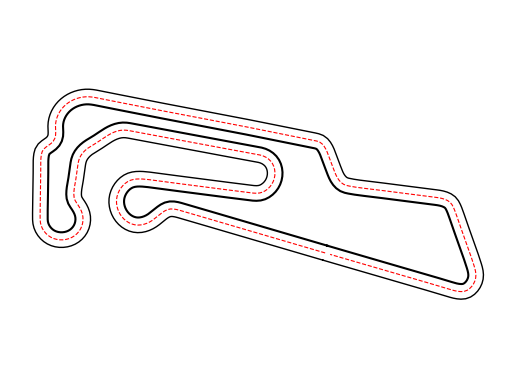

In [5]:
# Create a reference path
ref_path = RefPath(center_line, width_left = 0.6, width_right = 0.6, speed_limt = 5, loop = True)

# Visualize the reference path
ref_path.plot_track(linewidth = 1)
ref_path.plot_track_center(linewidth = 0.8, c='r')
plt.axis('equal')
_ = plt.axis('off')


## Test your ILQR planner
The planner need to warmup for a few steps for the first time it is run. This process will takes 10-30 seconds depending on your computer.

In [10]:
ilqr = ILQR(config_file)
ilqr.update_ref_path(ref_path)


Line Search Alphas:  [10.    1.    0.1   0.01]
ILQR setting: ILQR config: {'num_dim_x': 5, 'num_dim_u': 2, 'T': 10, 'dt': 0.1, 'platform': 'cpu', 'max_iter': 50, 'tol': 0.05, 'line_search_base': 0.1, 'line_search_a': -1, 'line_search_b': 3, 'line_search_c': 1, 'reg_min': '1e-5', 'reg_max': '1e8', 'reg_scale_down': 5, 'reg_scale_up': 5, 'reg_init': 1.0, 'max_attempt': 5, 'wheelbase': 0.257, 'radius': 0.13, 'width': 0.22, 'length': 0.4, 'delta_max': 0.35, 'delta_min': -0.35, 'v_max': 5.0, 'v_min': 0.0, 'omega_min': -6.0, 'omega_max': 6.0, 'a_max': 5.0, 'a_min': -5.0, 'v_ref': 5.0, 'dim_closest_pt_x': 0, 'dim_closest_pt_y': 1, 'dim_path_slope': 2, 'path_cost_type': 'quadratic', 'path_weight': 2.0, 'path_huber_delta': 2, 'vel_cost_type': 'quadratic', 'vel_weight': 0.2, 'vel_huber_delta': 1, 'dim_vel_limit': 3, 'vel_limit_a': 10.0, 'vel_limit_b': 1.0, 'heading_cost_type': 'quadratic', 'heading_weight': 1, 'heading_huber_delta': 1, 'lat_accel_thres': 6.0, 'lat_accel_a': 5.0, 'lat_accel_b': 2

### Plan for one step

Jorig:  172.5887 Jnew:  1458.7905 alpha 10.0
Jorig:  172.5887 Jnew:  2101.0955 alpha 1.0
Jorig:  172.5887 Jnew:  243.95058 alpha 0.1
Jorig:  172.5887
Jnew:  149.38925
J difference:  23.199448
Jorig:  149.38925 Jnew:  1747.2894 alpha 10.0
Jorig:  149.38925 Jnew:  1882.7328 alpha 1.0
Jorig:  149.38925 Jnew:  421.1377 alpha 0.1
Jorig:  149.38925
Jnew:  140.23183
J difference:  9.157425
Jorig:  140.23183 Jnew:  1793.0619 alpha 10.0
Jorig:  140.23183 Jnew:  1891.9594 alpha 1.0
Jorig:  140.23183 Jnew:  494.012 alpha 0.1
Jorig:  140.23183
Jnew:  130.42044
J difference:  9.811386
Jorig:  130.42044 Jnew:  1941.7191 alpha 10.0
Jorig:  130.42044 Jnew:  1878.3273 alpha 1.0
Jorig:  130.42044 Jnew:  344.762 alpha 0.1
Jorig:  130.42044
Jnew:  123.86595
J difference:  6.554489
Jorig:  123.86595 Jnew:  1842.4241 alpha 10.0
Jorig:  123.86595 Jnew:  1745.3148 alpha 1.0
Jorig:  123.86595 Jnew:  166.20827 alpha 0.1
Jorig:  123.86595
Jnew:  119.86543
J difference:  4.000519
Jorig:  119.86543 Jnew:  1872.800

Text(0.5, 1.0, 'Lateral Acceleration')

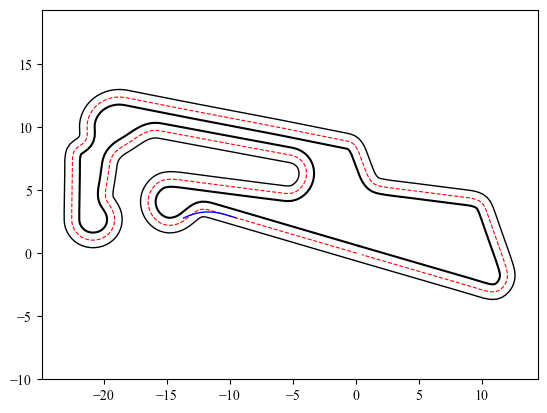

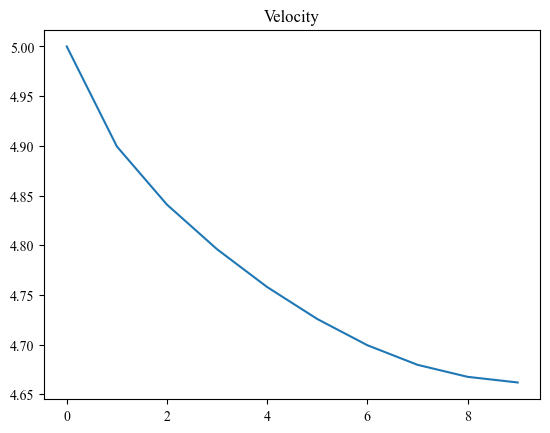

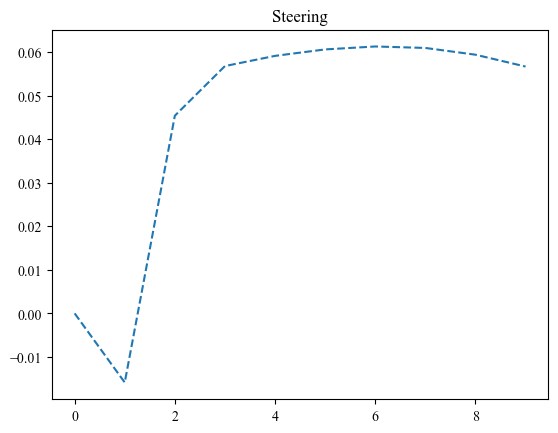

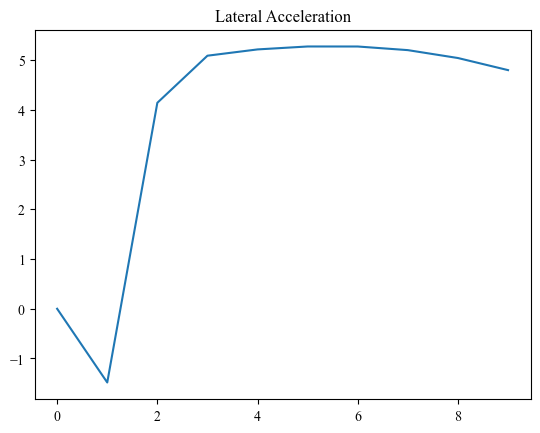

In [12]:
# Create an ILQR solver
x_init = np.array([x[60], y[60], 5, np.arctan2(y[61]-y[60], x[61]-x[60]), 0])
plan = ilqr.plan(x_init)

# Visualize the reference path
ref_path.plot_track(linewidth = 1)
ref_path.plot_track_center(linewidth = 0.8, c='r')
plt.plot(plan['trajectory'][0, :], plan['trajectory'][1, :], 'b-', linewidth=1)
plt.axis('equal')

plt.figure()
a = plan['trajectory'][2, :] 
plt.plot(a)
plt.title('Velocity')

plt.figure()
# plt.plot(plan['controls'][0,:])
plt.plot(plan['trajectory'][-1,:], '--')
plt.title('Steering')

plt.figure()
a = plan['trajectory'][2, :]**2 / 0.257 * np.tan(plan['trajectory'][-1, :])
plt.plot(a)
plt.title('Lateral Acceleration')


### Plan for the entire track

In [13]:
itr_receding = 400
init_control = np.zeros((2, ilqr.T))
x_cur = np.array([x[0], y[0], 4, np.arctan2(y[1]-y[0], x[1]-x[0]), 0])
state_history = np.zeros((5,itr_receding + 1))
state_history[:,0] = x_cur
plan_history = np.zeros((5, ilqr.T, itr_receding))
control_history = np.zeros((2,itr_receding))
t_process = np.zeros(itr_receding)
for i in (pbar := tqdm.tqdm(range(itr_receding))):
    plan = ilqr.plan(x_cur, init_control)
    
    trajectory = plan['trajectory']
    controls = plan['controls']
    
    # record the state and control
    state_history[:,i+1]  = trajectory[:,1]
    control_history[:,i] = controls[:,0]
    plan_history[:,:,i] = trajectory
    t_process[i] = plan['t_process']
    
    # prepare for next iteration
    x_cur = trajectory[:,1] 
    init_control[:,:-1] = controls[:,1:]
    
    pbar.set_description(f"ILQR takes : {plan['t_process']:.2f} sec']")

  0%|          | 0/400 [00:00<?, ?it/s]

Jorig:  -5.310198 Jnew:  35.88197 alpha 10.0
Jorig:  -5.310198 Jnew:  -4.7563076 alpha 1.0
Jorig:  -5.310198
Jnew:  -5.3968697
J difference:  0.08667183
Jorig:  -5.3968697 Jnew:  35.828835 alpha 10.0
Jorig:  -5.3968697 Jnew:  -4.6717196 alpha 1.0
Jorig:  -5.3968697
Jnew:  -5.4530983
J difference:  0.056228638
Jorig:  -5.4530983 Jnew:  34.682045 alpha 10.0
Jorig:  -5.4530983 Jnew:  -4.6335425 alpha 1.0
Jorig:  -5.4530983
Jnew:  -5.4804225
J difference:  0.0273242
Jorig:  -5.4804225 Jnew:  33.313347 alpha 10.0
Jorig:  -5.4804225 Jnew:  -4.6221237 alpha 1.0
Jorig:  -5.4804225
Jnew:  -5.4848323
J difference:  0.00440979
Converged?  True


ILQR takes : 1.49 sec']:   0%|          | 1/400 [00:01<10:03,  1.51s/it]

Jorig:  -5.614049 Jnew:  33.022163 alpha 10.0
Jorig:  -5.614049 Jnew:  -4.850895 alpha 1.0


ILQR takes : 0.41 sec']:   0%|          | 2/400 [00:01<05:45,  1.15it/s]

Jorig:  -5.614049
Jnew:  -5.620282
J difference:  0.0062332153
Converged?  True


ILQR takes : 0.45 sec']:   1%|          | 3/400 [00:02<04:29,  1.47it/s]

Jorig:  -5.7418613 Jnew:  33.874496 alpha 10.0
Jorig:  -5.7418613 Jnew:  -4.953656 alpha 1.0
Jorig:  -5.7418613
Jnew:  -5.751103
J difference:  0.009241581
Converged?  True
Jorig:  -5.8626375 Jnew:  34.341843 alpha 10.0
Jorig:  -5.8626375 Jnew:  -5.0368176 alpha 1.0
Jorig:  -5.8626375
Jnew:  -5.875398
J difference:  0.012760639
Jorig:  -5.875398 Jnew:  33.489487 alpha 10.0
Jorig:  -5.875398 Jnew:  -4.9761963 alpha 1.0
Jorig:  -5.875398 Jnew:  -5.8738227 alpha 0.1


ILQR takes : 0.88 sec']:   1%|          | 4/400 [00:03<05:01,  1.32it/s]

Jorig:  -5.875398
Jnew:  -5.8757725
J difference:  0.00037431717
Converged?  True
Jorig:  -5.9799185 Jnew:  34.254265 alpha 10.0
Jorig:  -5.9799185 Jnew:  -5.1006 alpha 1.0
Jorig:  -5.9799185
Jnew:  -5.9923263
J difference:  0.01240778


ILQR takes : 0.84 sec']:   1%|▏         | 5/400 [00:04<05:12,  1.27it/s]

Jorig:  -5.9923263 Jnew:  33.283787 alpha 10.0
Jorig:  -5.9923263 Jnew:  -5.051624 alpha 1.0
Jorig:  -5.9923263
Jnew:  -5.994121
J difference:  0.0017948151
Converged?  True


ILQR takes : 0.37 sec']:   2%|▏         | 6/400 [00:04<04:15,  1.54it/s]

Jorig:  -6.1225185 Jnew:  32.71324 alpha 10.0
Jorig:  -6.1225185 Jnew:  -5.220822 alpha 1.0
Jorig:  -6.1225185
Jnew:  -6.122619
J difference:  0.00010061264
Converged?  True
Jorig:  -6.224849 Jnew:  32.5189 alpha 10.0
Jorig:  -6.224849 Jnew:  -5.2914267 alpha 1.0
Jorig:  -6.224849
Jnew:  -6.230724
J difference:  0.005874634
Converged?  True


ILQR takes : 0.41 sec']:   2%|▏         | 7/400 [00:04<03:45,  1.74it/s]

Jorig:  -6.3115325 Jnew:  32.047234 alpha 10.0
Jorig:  -6.3115325 Jnew:  -5.3783526 alpha 1.0


ILQR takes : 0.51 sec']:   2%|▏         | 8/400 [00:05<03:38,  1.80it/s]

Jorig:  -6.3115325
Jnew:  -6.318248
J difference:  0.0067152977
Converged?  True
Jorig:  -6.3814497 Jnew:  31.386272 alpha 10.0
Jorig:  -6.3814497 Jnew:  -5.4936295 alpha 1.0


ILQR takes : 0.48 sec']:   2%|▏         | 9/400 [00:05<03:28,  1.87it/s]

Jorig:  -6.3814497
Jnew:  -6.3865285
J difference:  0.0050787926
Converged?  True
Jorig:  -6.43526 Jnew:  30.05407 alpha 10.0
Jorig:  -6.43526 Jnew:  -5.6201286 alpha 1.0


ILQR takes : 0.50 sec']:   2%|▎         | 10/400 [00:06<03:25,  1.90it/s]

Jorig:  -6.43526
Jnew:  -6.4425683
J difference:  0.007308483
Converged?  True
Jorig:  -6.4803734 Jnew:  28.51224 alpha 10.0
Jorig:  -6.4803734 Jnew:  -5.74334 alpha 1.0
Jorig:  -6.4803734 Jnew:  -6.479536 alpha 0.1


ILQR takes : 0.55 sec']:   3%|▎         | 11/400 [00:06<03:28,  1.87it/s]

Jorig:  -6.4803734
Jnew:  -6.481111
J difference:  0.0007376671
Converged?  True
Jorig:  -6.500042 Jnew:  28.865221 alpha 10.0
Jorig:  -6.500042 Jnew:  -5.7332215 alpha 1.0


ILQR takes : 0.47 sec']:   3%|▎         | 12/400 [00:07<03:20,  1.93it/s]

Jorig:  -6.500042
Jnew:  -6.507529
J difference:  0.00748682
Converged?  True
Jorig:  -6.5178704 Jnew:  26.84349 alpha 10.0


ILQR takes : 0.47 sec']:   3%|▎         | 12/400 [00:07<04:12,  1.54it/s]

Jorig:  -6.5178704 Jnew:  -5.853204 alpha 1.0


KeyboardInterrupt: 

### Visualize the results

In [ ]:
plt.figure()
plt.plot(state_history[0,:], state_history[1,:], 'b-', linewidth= 2, alpha =0.6, label = 'Trajectory')
ref_path.plot_track(linewidth = 1)
ref_path.plot_track_center(linewidth = 0.8, c='r')
plt.legend(prop={'size': 10})
plt.axis('equal')
plt.axis('off')
plt.show()

In [ ]:
plt.figure()
ref_path.plot_track(linewidth = 1)
ref_path.plot_track_center(linewidth = 0.8, c='r')

sc = plt.scatter(state_history[0, :-1], state_history[1,:-1], s = 10, 
                c=state_history[2,:-1], cmap=cm.jet, 
                vmin=0, vmax=5, edgecolor='none', marker='o')
cbar = plt.colorbar(sc)
cbar.set_label(r"Velocity [$m/s$]", size=10)
plt.axis('equal')
plt.show()

In [ ]:
plt.figure()
ref_path.plot_track(linewidth = 1)
ref_path.plot_track_center(linewidth = 0.8, c='r')
sc = plt.scatter(state_history[0, :-1], state_history[1,:-1], s = 10, 
                c=control_history[0,:], cmap=cm.jet, 
                vmin=0, vmax=5, edgecolor='none', marker='o')
cbar = plt.colorbar(sc)
cbar.set_label(r"Longitudinal Accel [$m/s^2$]", size=10)
plt.axis('equal')
plt.show()

In [ ]:
plt.figure()
ref_path.plot_track(linewidth = 1)
ref_path.plot_track_center(linewidth = 0.8, c='r')
alat = state_history[2,:]**2*np.tan(state_history[-1,:])/0.257
sc = plt.scatter(state_history[0, ], state_history[1,], s = 10, 
                c=alat, cmap=cm.jet, 
                vmin = 0, vmax=5, edgecolor='none', marker='o')
cbar = plt.colorbar(sc)
cbar.set_label(r"Lateral Accel [$m/s^2$]", size=10)
plt.axis('equal')
plt.show()

In [ ]:
sim = plt.figure()
ref_path.plot_track()
plan_plot = plt.plot([], [], linewidth= 2)[0]
traj_plot = plt.scatter([], [], s = 10, c=[], cmap=cm.jet, vmin=0, vmax=5, edgecolor='none', marker='o')
cbar = plt.colorbar(traj_plot)
cbar.set_label(r"velocity [$m/s$]", size=20)
plt.axis('equal')
plt.close()

def drawframe(n):
    traj_plot.set_offsets(state_history[:2,:n+1].T)
    traj_plot.set_array(state_history[2,:n+1])
    plan_plot.set_data(plan_history[0,:, n], plan_history[1,:, n])
    
    return (traj_plot,plan_plot)


# blit=True re-draws only the parts that have changed.
anim = animation.FuncAnimation(sim, drawframe, frames=itr_receding, interval=ilqr.dt*1000, blit=True)
HTML(anim.to_html5_video())